In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/scrapped-lyrics-from-6-genres/artists-data.csv
/kaggle/input/scrapped-lyrics-from-6-genres/lyrics-data.csv


In [2]:
lyrics_data = pd.read_csv('/kaggle/input/scrapped-lyrics-from-6-genres/lyrics-data.csv')
lyrics_data.rename(columns={"ALink": "Link"}, inplace=True)

In [3]:
lyrics_data

,Link,SName,SLink,Lyric,Idiom
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH
1,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH
2,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH
3,/10000-maniacs/,A Campfire Song,/10000-maniacs/a-campfire-song.html,"A lie to say, ""O my mountain has coal veins an...",ENGLISH
4,/10000-maniacs/,Everyday Is Like Sunday,/10000-maniacs/everyday-is-like-sunday.html,Trudging slowly over wet sand. Back to the ben...,ENGLISH
...,...,...,...,...,...
209517,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,/zeca-pagodinho/vou-botar-teu-nome-na-macumba....,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE
209518,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE
209519,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE
209520,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE


In [4]:
artist_data = pd.read_csv('/kaggle/input/scrapped-lyrics-from-6-genres/artists-data.csv')

In [5]:
lyrics_data.loc[lyrics_data['Idiom'] == 'ENGLISH', 'Link']

0          /10000-maniacs/
1          /10000-maniacs/
2          /10000-maniacs/
3          /10000-maniacs/
4          /10000-maniacs/
                ...       
207619             /sambo/
207624             /sambo/
207628             /sambo/
207792         /seu-jorge/
209285    /zeca-pagodinho/
Name: Link, Length: 114723, dtype: object

In [6]:
merged_dfs = lyrics_data.merge(artist_data, how='inner', on='Link')
merged_dfs

,Link,SName,SLink,Lyric,Idiom,Artist,Songs,Popularity,Genre,Genres
0,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
1,/10000-maniacs/,More Than This,/10000-maniacs/more-than-this.html,I could feel at the time. There was no way of ...,ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
2,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
3,/10000-maniacs/,Because The Night,/10000-maniacs/because-the-night.html,"Take me now, baby, here as I am. Hold me close...",ENGLISH,10000 Maniacs,110,0.3,Pop,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
4,/10000-maniacs/,These Are Days,/10000-maniacs/these-are-days.html,These are. These are days you'll remember. Nev...,ENGLISH,10000 Maniacs,110,0.3,Rock,Rock; Pop; Electronica; Dance; J-Pop/J-Rock; G...
...,...,...,...,...,...,...,...,...,...,...
227508,/zeca-pagodinho/,Vou Botar Teu Nome Na Macumba,/zeca-pagodinho/vou-botar-teu-nome-na-macumba....,Eu vou botar teu nome na macumba. Vou procurar...,PORTUGUESE,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
227509,/zeca-pagodinho/,Vou Procurar Esquecer,/zeca-pagodinho/vou-procurar-esquecer.html,Vou procurar um novo amor na minha vida. Porqu...,PORTUGUESE,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
227510,/zeca-pagodinho/,Vou Ver Juliana,/zeca-pagodinho/vou-ver-juliana.html,Quando a mare vazá. Vou vê juliana. Vou vê jul...,PORTUGUESE,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...
227511,/zeca-pagodinho/,Yaô Cadê A Samba / Outro Recado / Hino,/zeca-pagodinho/yao-cade-a-samba-outro-recado-...,"Ô Yaô. Yaô, cadê a samba?. Está mangando na cu...",PORTUGUESE,Zeca Pagodinho,309,13.2,Samba,Samba; Pagode; Bossa Nova; MPB; Jovem Guarda; ...


In [7]:
eng_artists = merged_dfs.loc[merged_dfs['Idiom'] == 'ENGLISH', ['Artist', 'SName', 'Lyric', 'Genre']].drop_duplicates(subset=['SName'])
eng_artists

,Artist,SName,Lyric,Genre
0,10000 Maniacs,More Than This,I could feel at the time. There was no way of ...,Rock
2,10000 Maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",Rock
4,10000 Maniacs,These Are Days,These are. These are days you'll remember. Nev...,Rock
6,10000 Maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",Rock
8,10000 Maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,Rock
...,...,...,...,...
223284,Nayara Portela,Sign of the Times (Harry Styles cover),Just stop your crying. It's a sign of the time...,Samba
223285,Nayara Portela,Stay (Rihanna cover),All along it was a fever. A cold sweat hot-hea...,Samba
223287,Nayara Portela,When I Was Your Man (Bruno Mars cover),"Same bed, but it feels just a little bit bigge...",Samba
225753,Sambô,"Sunday, Bloody Sunday",I can't believe the news today. I can't close ...,Samba


In [8]:
np.any(eng_artists['Artist'] == 'Drake')

True

In [9]:
drake = eng_artists.loc[eng_artists['Artist'] == 'Drake']
one_dance_lyrics = drake.loc[drake['SName'] == 'One Dance', 'Lyric'].values
one_dance_lyrics

array(["[Intro: Kyla Wizkid]. Baby I like your style. [Verse 1: Drake]. Grips on your waist. Front way, back way. You know that I don't play. Streets not safe. But I never run away. Even when I'm away. Oti, oti, there's never much love when we go Ot. I pray to make it back in one piece. I pray, I pray. [Hook: Drake]. That's why I need a one dance. Got a Hennessy in my hand. One more time 'fore I go. Higher powers taking a hold on me. I need a one dance. Got a Hennessy in my hand. One more time 'fore I go. Higher powers is taking a hold on me. [Bridge: Kyla Wizkid]. Baby I like your style. [Verse 2: Drake]. Strength and guidance. All that I'm wishing for my friends. Nobody makes it from my ends. I had to bust up the silence. You know you gotta stick by me. Soon as you see the text, reply me. I don't wanna spend time fighting. We've got no time. [Hook: Drake]. That's why I need a one dance. Got a Hennessy in my hand. One more time 'fore I go. Higher powers taking a hold on me. I need a o

In [10]:
drake = drake.reset_index()
drake

,index,Artist,SName,Lyric,Genre
0,95973,Drake,In My Feelings,"Trap, TrapMoneyBenny. This shit got me in my f...",Hip Hop
1,95974,Drake,God's Plan,Yeah they wishin' and wishin' and wishin' and ...,Hip Hop
2,95975,Drake,Hotline Bling,"You used to call me on my, you used to, you us...",Hip Hop
3,95976,Drake,One Dance,[Intro: Kyla Wizkid]. Baby I like your style. ...,Hip Hop
4,95977,Drake,Legend,(Refrão). When I pull up on a nigga. Tell that...,Hip Hop
...,...,...,...,...,...
217,96256,Drake,Wu-Tang Forever,"(refrão). I just love when I'm with you, yeah,...",Hip Hop
218,96257,Drake,Yamaha Mama (Feat. Chris Brown),"[Verse 1: Drake]. Listen girl, you so bad and ...",Hip Hop
219,96258,Drake,You & The 6,"(Verso 1). Having conversations with mama, man...",Hip Hop
220,96259,Drake,"You Know, You Know",[hook]. You know you know. You know you know. ...,Hip Hop


In [11]:
drake.drop(columns=['index'], inplace=True)
drake

,Artist,SName,Lyric,Genre
0,Drake,In My Feelings,"Trap, TrapMoneyBenny. This shit got me in my f...",Hip Hop
1,Drake,God's Plan,Yeah they wishin' and wishin' and wishin' and ...,Hip Hop
2,Drake,Hotline Bling,"You used to call me on my, you used to, you us...",Hip Hop
3,Drake,One Dance,[Intro: Kyla Wizkid]. Baby I like your style. ...,Hip Hop
4,Drake,Legend,(Refrão). When I pull up on a nigga. Tell that...,Hip Hop
...,...,...,...,...
217,Drake,Wu-Tang Forever,"(refrão). I just love when I'm with you, yeah,...",Hip Hop
218,Drake,Yamaha Mama (Feat. Chris Brown),"[Verse 1: Drake]. Listen girl, you so bad and ...",Hip Hop
219,Drake,You & The 6,"(Verso 1). Having conversations with mama, man...",Hip Hop
220,Drake,"You Know, You Know",[hook]. You know you know. You know you know. ...,Hip Hop


In [12]:
for i in range(10):
    song = drake.loc[i, ['SName', 'Lyric']]
    print("Song", song['SName'], '\nLyrics', song['Lyric'])

Song In My Feelings 
Lyrics Trap, TrapMoneyBenny. This shit got me in my feelings. Gotta be real with it, yup. Kiki, do you love me? Are you riding?. Say you'll never ever leave from beside me. 'Cause I want ya, and I need ya. And I'm down for you always. KB, do you love me? Are you riding?. Say you'll never ever leave from beside me. 'Cause I want ya, and I need ya. And I'm down for you always. Look, the new me is really still the real me. I swear you gotta feel me before they try and kill me. They gotta make some choices. they runnin' out of options. 'Cause I've been goin' off. and they don't know when it's stoppin'. And when you get to toppin', I see that you've been learnin'. And when I take you shoppin'. you spend it like you earned it. And when you popped off on your ex he deserved it. I thought you were the one from the jump that confirmed it. TrapMoneyBenny. I buy you Champagne but you love some Henny. From the block like you Jenny. I know you special, girl, 'cause I know too m

In [13]:
import seaborn as sns

eng_artists.reset_index(inplace=True, drop=True)

<AxesSubplot:xlabel='Genre', ylabel='Count'>

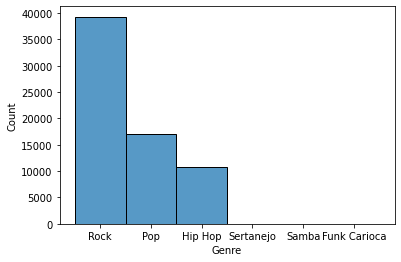

In [14]:
sns.histplot(x = 'Genre', data = eng_artists)

<AxesSubplot:xlabel='Genre', ylabel='Count'>

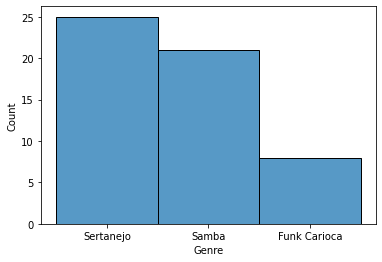

In [15]:
sns.histplot(x=eng_artists[~eng_artists['Genre'].isin(['Rock', 'Pop', 'Hip Hop'])]['Genre'])

In [16]:
eng_artists.head()

,Artist,SName,Lyric,Genre
0,10000 Maniacs,More Than This,I could feel at the time. There was no way of ...,Rock
1,10000 Maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",Rock
2,10000 Maniacs,These Are Days,These are. These are days you'll remember. Nev...,Rock
3,10000 Maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",Rock
4,10000 Maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,Rock


In [17]:
len(eng_artists.loc[1, 'Lyric'].split())

238

In [18]:
def get_lyr_len(row): 
    row['LyricLen'] = len(row['Lyric'].split())
    return row

In [19]:
eng_artists = eng_artists.apply(get_lyr_len, axis=1)
eng_artists.head()

,Artist,SName,Lyric,Genre,LyricLen
0,10000 Maniacs,More Than This,I could feel at the time. There was no way of ...,Rock,145
1,10000 Maniacs,Because The Night,"Take me now, baby, here as I am. Hold me close...",Rock,238
2,10000 Maniacs,These Are Days,These are. These are days you'll remember. Nev...,Rock,172
3,10000 Maniacs,A Campfire Song,"A lie to say, ""O my mountain has coal veins an...",Rock,263
4,10000 Maniacs,Everyday Is Like Sunday,Trudging slowly over wet sand. Back to the ben...,Rock,118


<AxesSubplot:xlabel='LyricLen', ylabel='Count'>

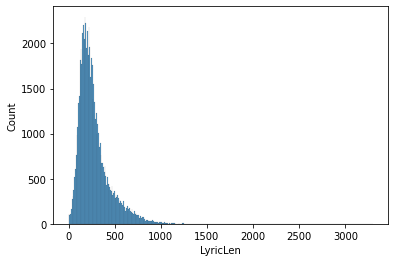

In [20]:
sns.histplot(x=eng_artists['LyricLen'])

<AxesSubplot:xlabel='LyricLen', ylabel='Count'>

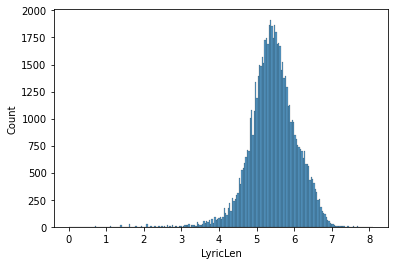

In [21]:
sns.histplot(x=np.log(eng_artists['LyricLen']))

In [22]:
artists = eng_artists['Artist'].value_counts().sort_values(ascending=False)
artists.head(60)

Elvis Presley                                   649
Bob Dylan                                       519
Bruce Springsteen                               448
Elvis Costello                                  444
Chris Brown                                     435
Bee Gees                                        406
50 Cent                                         404
Van Morrison                                    397
David Bowie                                     395
Neil Young                                      394
Snoop Dogg                                      365
Paul McCartney                                  348
Rod Stewart                                     331
Eminem                                          327
Rolling Stones                                  314
Tupac Shakur                                    309
Eric Clapton                                    308
Glee                                            307
Alice Cooper                                    304
Beck        

[(0.0, 150.0)]

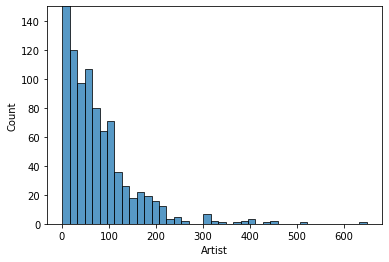

In [23]:
artists_ax = sns.histplot(x=artists)
artists_ax.set(ylim=(0, 150))

In [24]:
artists.describe()

count    1115.000000
mean       60.328251
std        72.452968
min         1.000000
25%         6.000000
50%        38.000000
75%        88.000000
max       649.000000
Name: Artist, dtype: float64

In [25]:
eng_artists[eng_artists['Artist'] == 'Drake'].reset_index(drop=True).sort_values(by='LyricLen')

,Artist,SName,Lyric,Genre,LyricLen
183,Drake,Summers Over Interlude,"Oh, baby, yeah. Days in the sun. And nights in...",Hip Hop,74
141,Drake,Nothings Into Somethings,[Intro: DJ Paul]. You ever hear some slow trac...,Hip Hop,139
149,Drake,Peak,"Treat you like princess, rest in heaven diana....",Hip Hop,142
47,Drake,Cece's Interlude,[Drake Singing]. All night I've been staring. ...,Hip Hop,145
87,Drake,Go Out Tonight,You've been home for three whole days. Actin' ...,Hip Hop,167
...,...,...,...,...,...
207,Drake,Used To (Feat. Lil Wayne),"(Intro: Riff Raff). Boys, now listen, we got m...",Hip Hop,966
157,Drake,Ransom (ft. Lil' Wayne),"Ransom,. . Yeah,. its Drizzy Baby. you already...",Hip Hop,967
36,Drake,Best I Ever Had (Remix) (Feat. Nicki Minaj),Baby you my everything. You're all I ever wont...,Hip Hop,974
85,Drake,Give Ya (ft. Trey Songz),"[Verse 1: Drake]. Check, look. And I ain't try...",Hip Hop,1017
